#### Eeg eye state
All data is from one continuous EEG measurement with the Emotiv EEG Neuroheadset. The duration of the measurement was 117 seconds.<br> The eye state was detected via a camera during the EEG measurement and added later manually to the file after analyzing the video frames. '1' indicates the eye-closed and '0' the eye-open state.<br> All values are in chronological order with the first measured value at the top of the data.<br>
Source: https://www.openml.org/search?type=data&sort=runs&status=active&id=1471

In [2]:
import pandas as pd
import numpy as np
from scipy.io import arff

import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from xgboost import XGBClassifier


d:\ML_DE\Advanced-Data-Analytics-\.venv\lib\site-packages\xgboost\compat.py:105: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [3]:
# Loading ARFF file
data, meta = arff.loadarff(r"EEG_Eye+State.csv")
df = pd.DataFrame(data)
df['eyeDetection'] = df['eyeDetection'].astype(int)
df.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AF3           14980 non-null  float64
 1   F7            14980 non-null  float64
 2   F3            14980 non-null  float64
 3   FC5           14980 non-null  float64
 4   T7            14980 non-null  float64
 5   P7            14980 non-null  float64
 6   O1            14980 non-null  float64
 7   O2            14980 non-null  float64
 8   P8            14980 non-null  float64
 9   T8            14980 non-null  float64
 10  FC6           14980 non-null  float64
 11  F4            14980 non-null  float64
 12  F8            14980 non-null  float64
 13  AF4           14980 non-null  float64
 14  eyeDetection  14980 non-null  int32  
dtypes: float64(14), int32(1)
memory usage: 1.7 MB


In [5]:
df.duplicated().sum()

0

In [6]:
# Let's check the target value 
df['eyeDetection'].value_counts()

eyeDetection
0    8257
1    6723
Name: count, dtype: int64

In [7]:
df.describe()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
count,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000
mean,4321.917777,4009.767694,4264.022433,4164.946326,4341.741075,4644.022379,4110.400160,4616.056904,4218.826610,4231.316200,4202.456900,4279.232774,4615.205336,4416.435832,0.448798
std,2492.072174,45.941672,44.428052,5216.404632,34.738821,2924.789537,4600.926543,29.292603,2136.408523,38.050903,37.785981,41.544312,1208.369958,5891.285043,0.497388
min,1030.770000,2830.770000,1040.000000,2453.330000,2089.740000,2768.210000,2086.150000,4567.180000,1357.950000,1816.410000,3273.330000,2257.950000,86.666700,1366.150000,0.000000
25%,4280.510000,3990.770000,4250.260000,4108.210000,4331.790000,4611.790000,4057.950000,4604.620000,4190.770000,4220.510000,4190.260000,4267.690000,4590.770000,4342.050000,0.000000
50%,4294.360000,4005.640000,4262.560000,4120.510000,4338.970000,4617.950000,4070.260000,4613.330000,4199.490000,4229.230000,4200.510000,4276.920000,4603.080000,4354.870000,0.000000
75%,4311.790000,4023.080000,4270.770000,4132.310000,4347.180000,4626.670000,4083.590000,4624.100000,4209.230000,4239.490000,4211.280000,4287.180000,4617.440000,4372.820000,1.000000
max,309231.000000,7804.620000,6880.510000,642564.000000,6474.360000,362564.000000,567179.000000,7264.100000,265641.000000,6674.360000,6823.080000,7002.560000,152308.000000,715897.000000,1.000000


In [8]:
signal_columns = df.columns.drop('eyeDetection')

# Cutting off the outliers at first and 99th percentile.
print(f"Max before clipping:{df[signal_columns].max().max():.2f}")
p01, p99 = df[signal_columns].quantile(0.01), df[signal_columns].quantile(0.99)
df[signal_columns] = df[signal_columns].clip(lower=p01, upper=p99, axis=1)
print(f"Max after clipping:{df[signal_columns].max().max():.2f}")

Max before clipping:715897.00
Max after clipping:4715.38


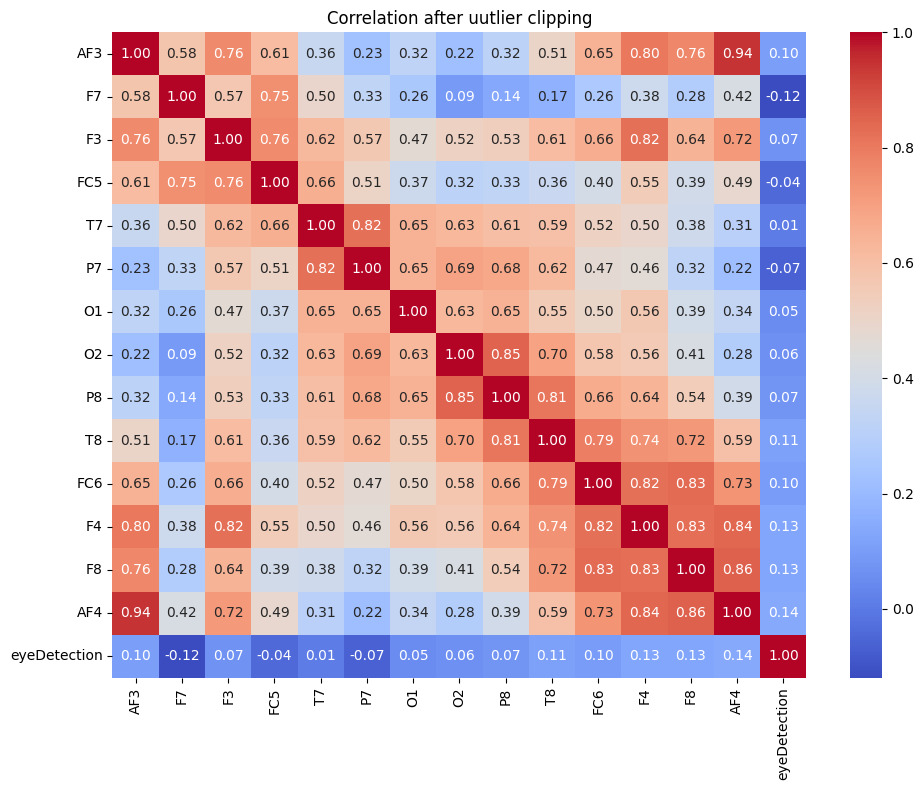

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation after uutlier clipping')
plt.tight_layout()
plt.show()

In [10]:
# I can see that many columns have high correlation with each other. 
# AF3/4, P8/7, F8 and FC5 have almost perfect correlation with each other.
# so I am gonna drop  some of them 
df = df.drop(['AF3', 'P8', 'F8'], axis=1) 
df.shape

(14980, 12)

In [11]:
#  midpoint between the two class medians 

signal_columns = df.columns.drop('eyeDetection')
medians = df.groupby('eyeDetection')[signal_columns].median()

gap =(medians.loc[1]-medians.loc[0]).abs().sort_values(ascending=False)
border = ((medians.loc[0]+medians.loc[1])/2).round(2)

summary = pd.DataFrame({'open':medians.loc[0].round(2),'closed':medians.loc[1].round(2),
                    'border':border,'gap':gap.round(2)}).sort_values('gap', ascending=False)
print(summary)
# AF3, AF4, F3, F4 and FC6 go up when eyes close
# F7 goes down when eyes close.

        open   closed   border   gap
AF4  4352.31  4360.00  4356.16  7.69
F4   4274.87  4278.97  4276.92  4.10
F7   4007.18  4003.59  4005.38  3.59
P7   4619.49  4615.90  4617.70  3.59
FC6  4199.49  4202.05  4200.77  2.56
T8   4228.21  4230.77  4229.49  2.56
F3   4261.54  4263.59  4262.57  2.05
O2   4612.82  4614.87  4613.84  2.05
FC5  4121.03  4119.49  4120.26  1.54
T7   4339.49  4338.46  4338.98  1.03
O1   4070.77  4070.26  4070.52  0.51


### Noise and Overlap

In [12]:
# In previous cell, there are three columns with very low gap
# I am gonna drop them
df = df.drop(columns=['T7', 'FC5', 'O1'])
df.shape

(14980, 9)

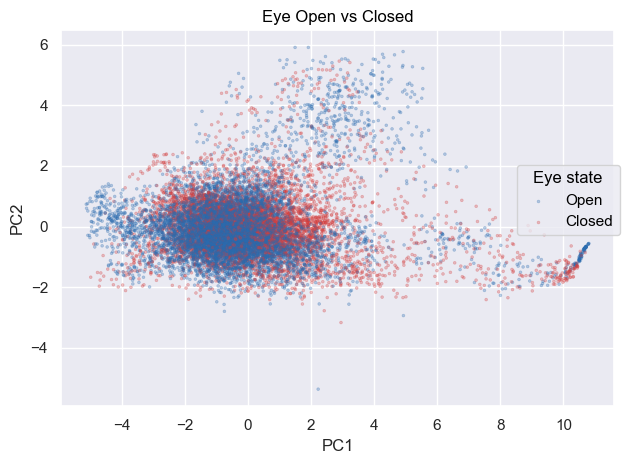

In [13]:
# Visualizing the overlap by uasing pca.

X, y = df.drop(columns='eyeDetection'), df['eyeDetection']

pcs = make_pipeline(StandardScaler(), PCA(n_components=2)).fit_transform(X)
plot_df = pd.DataFrame(pcs, columns=['PC1', 'PC2']).assign(eye_state=y.map({0: 'Open', 1: 'Closed'}))

(so.Plot(plot_df, x='PC1', y='PC2', color='eye_state')
 .add(so.Dot(alpha=.30, pointsize=2)).scale(color=['#2b6cb0', '#d53f3f'])
 .label(title='Eye Open vs Closed', color='Eye state').show())

# Source: https://seaborn.pydata.org/api.html#objects-interface
# What I can see there is not clear boudary between open and close 


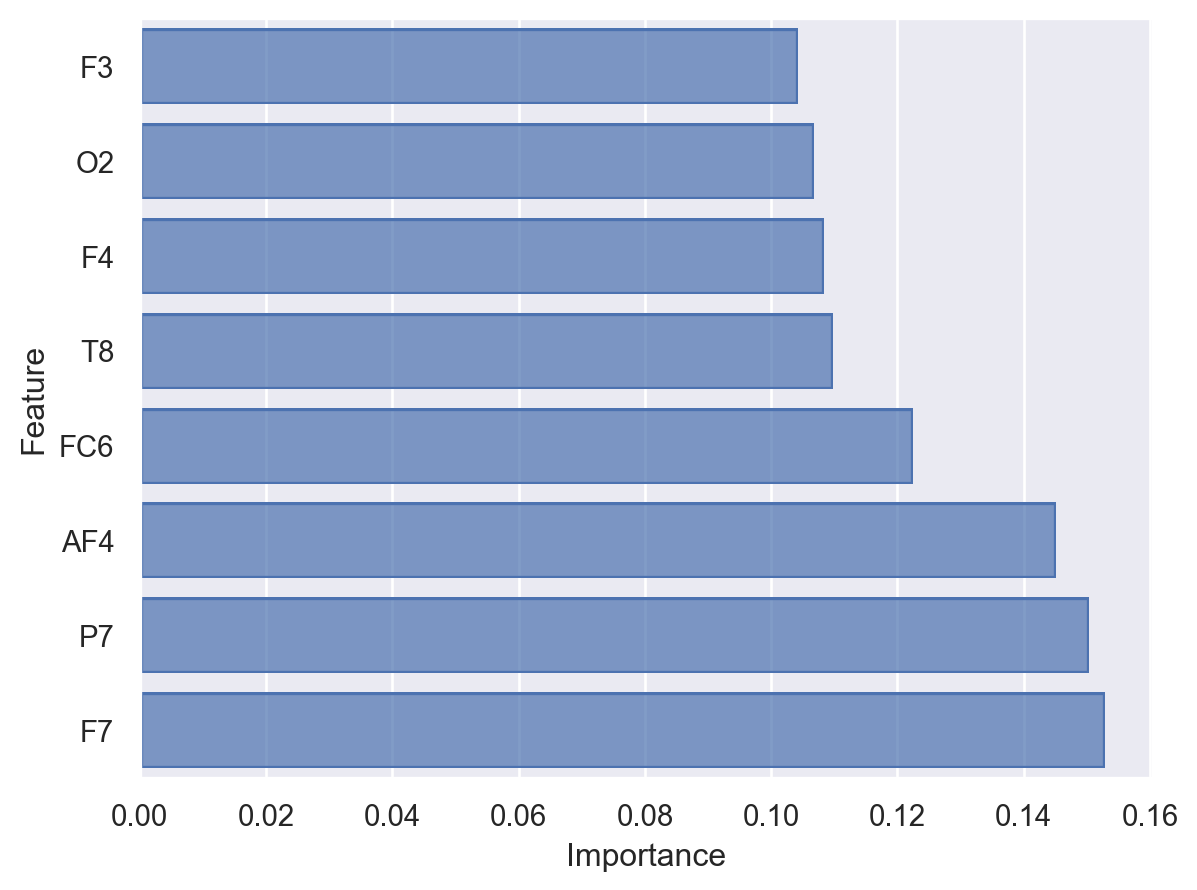

In [14]:
importance_columns = pd.Series(RandomForestClassifier(n_estimators=100, random_state=42).fit(X, y).feature_importances_, index=X.columns).sort_values().rename_axis("Feature").reset_index(name="Importance")
so.Plot(importance_columns, x="Importance", y="Feature").add(so.Bar())
